In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("✅ Google Drive 마운트 성공.")
except ImportError:
    print("ℹ️ Google Colab 환경이 아닙니다. Drive 마운트를 건너<0xEB><0><0x81/>니다.")
except Exception as e:
    print(f"❌ Google Drive 마운트 중 오류 발생: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive 마운트 성공.


# Gradient Boosting Machine (GBM)


1. 모델 소개
Gradient Boosting Machine (GBM)은 Jerome H. Friedman이 제안한 앙상블 학습 기법으로, 여러 개의 약한 학습기(주로 결정 트리)를 순차적으로 학습시켜 이전 모델의 오류를 보완해 나가는 방식으로 강력한 예측 모델을 만듭니다. 부스팅 알고리즘을 특정 절차가 아닌, 함수 공간(Function Space)에서 손실 함수를 최적화하는 일반적인 프레임워크로 재해석하여 XGBoost, LightGBM과 같은 현대 부스팅 모델의 이론적 기틀을 마련했습니다.   

2. 주요 특징
함수 공간에서의 경사 하강법 (Gradient Descent in Function Space) GBM은 모델 학습 과정을 파라미터 최적화가 아닌 함수 최적화 문제로 접근합니다. 각 단계에서 손실 함수를 가장 가파르게 감소시키는 방향(Negative Gradient)으로 새로운 약한 학습기를 추가하는 방식을 사용합니다.   

유사 잔차 (Pseudo-Residuals) 새로운 약한 학습기는 이전 모델의 실제 잔차(Residual)가 아닌, 손실 함수의 그래디언트를 기반으로 계산된 '유사 잔차'를 학습 목표로 삼습니다. 이를 통해 제곱 오차(Squared Error) 외에 다른 다양한 손실 함수에도 부스팅을 적용할 수 있습니다.   

임의의 미분 가능한 손실 함수 (Arbitrary Differentiable Loss Functions) 미분만 가능하다면 어떤 손실 함수든 사용할 수 있어 높은 유연성을 가집니다. 이 덕분에 회귀, 분류 등 다양한 문제에 동일한 프레임워크를 적용할 수 있습니다.   

탐욕적 단계적 학습 (Greedy Stagewise Approach) 모델은 한 번에 하나의 약한 학습기를 순차적으로 추가하는 탐욕적(Greedy) 방식으로 구축됩니다. 각 단계에서는 이전에 추가된 학습기는 그대로 두고, 현재 모델의 성능을 가장 크게 개선하는 새로운 학습기만 찾습니다.   

3. 참고 자료
논문 제목: Greedy Function Approximation: A Gradient Boosting Machine    

저자: Jerome H. Friedman    

학회: The Annals of Statistics (2001)    

논문 링크: http://www.jstor.org/stable/2699986    



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive 마운트 성공!
ℹ️ '/content/drive/MyDrive/utils' 경로는 이미 sys.path에 존재합니다.
✅ 한글 폰트 '나눔바른고딕' 설정 완료
✅ data_load 모듈 임포트 성공
🔍 ['2025-01-01'부터 '2025-02-01'까지의 데이터를 로드]


/content/drive/MyDrive/utils/data_load.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(dfs_to_concat, ignore_index=True)



✅ 총 32개 파일, 952776개 행의 데이터를 성공적으로 합쳤습니다.
✅ preprocessor 모듈 임포트 성공

--- 데이터 전처리 시작 ---
ℹ️ 다음 object 컬럼을 문자열로 변환합니다: ['생성일', '급수펌프 입력', '배기 재 순환 온도', '버너온도', '재순환 O2', '재순환 NOx', '진동센서1', '진동센서2', '운전시간', '확률 업데이트 시간']
✅ Object 타입 컬럼 문자열 변환 완료 (오류 발생 시 일부 건너뜀)
--- 데이터 전처리 시작 ---
✅ 1. 불필요한 컬럼 14개 제거 완료
✅ 2-1. 범주형 데이터 결측치 처리 완료
✅ 2-2. 범주형 변수 변환 완료
ℹ️ 2-3. 처리할 수치형 결측치가 없습니다.
✅ 3. 피처 스케일링 완료
--- 데이터 전처리 완료 ---
✅ '효율(순간)' 100 이상인 행 0개 제거 완료
--- 데이터 전처리 완료 ---

✅ 데이터 학습/테스트 분할 완료 (80%/20%)
학습 데이터: (762220, 32), 테스트 데이터: (190556, 32)

--- 하이퍼파라미터 튜닝 시작 (RandomizedSearchCV) ---
Fitting 2 folds for each of 10 candidates, totalling 20 fits

✅ 하이퍼파라미터 튜닝 완료
최적 하이퍼파라미터: {'subsample': np.float64(0.9999999999999999), 'n_estimators': np.int64(150), 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': np.int64(5), 'learning_rate': 0.15}

--- 최적 파라미터로 모델 학습 및 평가 시작 ---
✅ 모델 학습 완료
✅ 예측 수행 완료

--- 모델 평가 결과 ---
Train R2: 0.999833
Test R2 : 0.999675
Train MSE: 0.000166
Test MSE : 0.000330
Train MAE:

/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3942258800.py:287: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

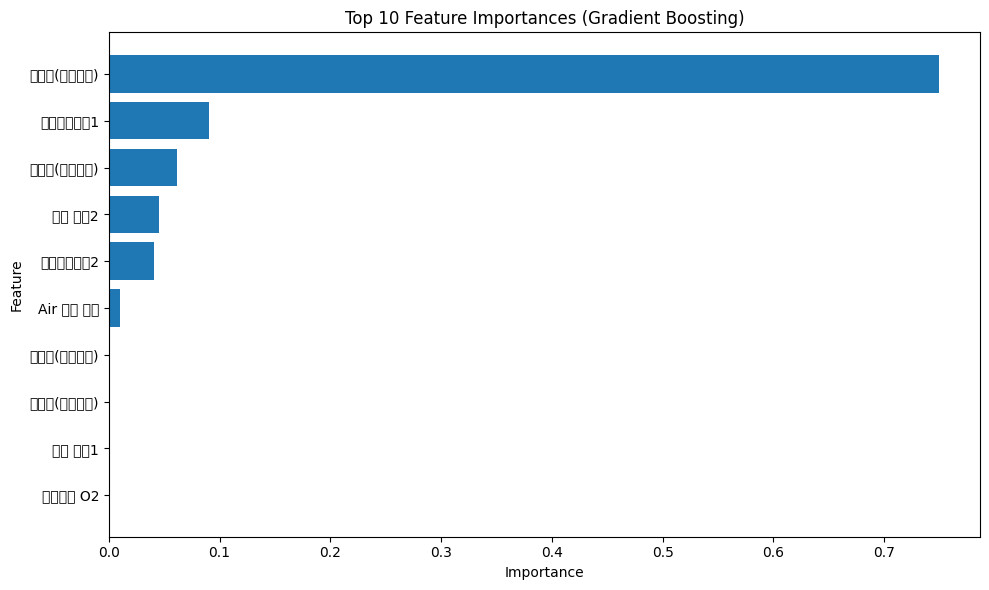


--- 모든 작업 완료 ---


In [ ]:
# -*- coding: utf-8 -*-
"""Gradient_Boosting_Machine.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1... # (예시 경로)

# Gradient Boosting Machine (Scikit-learn)

## 1. 모델 소개
---
Gradient Boosting Machine (GBM)은 여러 개의 약한 학습기(보통 결정 트리)를 순차적으로 학습시켜 이전 모델의 오류를 보완해나가는 방식으로 강력한 예측 모델을 만드는 앙상블 기법입니다. Scikit-learn 라이브러리에 구현된 `GradientBoostingRegressor` (회귀) 또는 `GradientBoostingClassifier` (분류)를 사용하여 쉽게 구현할 수 있습니다.

## 2. 주요 특징
---
- **순차적 학습**: 각 트리는 이전 트리들의 잔차(Residual)를 학습하여 점진적으로 모델 성능을 개선합니다.
- **손실 함수 최적화**: 다양한 손실 함수(Least Squares, LAD, Huber 등)를 경사 하강법(Gradient Descent)을 통해 최적화합니다.
- **과적합 제어**: 학습률(Learning Rate), 트리 깊이(Max Depth), 서브샘플링(Subsample) 등의 파라미터를 통해 과적합을 제어할 수 있습니다.
- **유연성**: 비교적 구현이 간단하고 다양한 문제에 적용 가능합니다. XGBoost나 LightGBM에 비해 학습 속도는 느릴 수 있으나, 여전히 강력한 성능을 제공합니다.

## 3. 참고 자료
---
- Scikit-learn Gradient Boosting 문서: [https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)
"""

# 라이브러리 및 환경설정
from google.colab import drive
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Google Drive 마운트
try:
    drive.mount('/content/drive')
    print("✅ Google Drive 마운트 성공!")
except Exception as e:
    if "already mounted" in str(e).lower():
        print("ℹ️ Google Drive는 이미 마운트되어 있습니다.")
    else:
        print(f"❌ Google Drive 마운트 중 오류 발생: {e}")
        # 필요시 여기서 스크립트 중단
        # exit()

# utils 폴더 경로 설정 (data_load.py, preprocessor.py가 있는 경로)
utils_path = '/content/drive/MyDrive/utils' # 사용자 환경에 맞게 경로 수정 필요

# sys.path에 utils 경로 추가
if utils_path not in sys.path:
    sys.path.append(utils_path)
    print(f"✅ '{utils_path}' 경로 추가 완료")
else:
    print(f"ℹ️ '{utils_path}' 경로는 이미 sys.path에 존재합니다.")


# 한글 폰트 설정 (나눔고딕)
try:
    plt.rc('font', family='NanumBarunGothic') # 또는 NanumGothic
    mpl.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
    print("✅ 한글 폰트 '나눔바른고딕' 설정 완료")
except Exception as e:
    print(f"⚠️ 한글 폰트 설정 오류: {e}")
    print("나눔 폰트 설치가 필요할 수 있습니다. `!apt-get -y install fonts-nanum*` 실행 후 런타임 재시작을 고려하세요.")
    # 기본 폰트로 대체하거나 오류 처리

# 데이터 로드 모듈 임포트 및 실행
try:
    import data_load
    print("✅ data_load 모듈 임포트 성공")
    # 데이터 로드 (시작/종료 날짜는 예시, 필요에 따라 수정)
    combined_df = data_load.load_data(start_date='2025-01-01', end_date='2025-02-01')
    if combined_df is None:
        print("❌ 데이터 로드 실패. 스크립트를 중단합니다.")
        # exit()
except ImportError as e:
    print(f"❌ data_load 모듈 임포트 중 오류 발생: {e}")
    print(f"'{utils_path}' 경로에 data_load.py 파일이 있는지 확인하세요.")
    # exit()
except Exception as e:
    print(f"❌ 데이터 로드 중 예상치 못한 오류 발생: {e}")
    # exit()


# 데이터 전처리 모듈 임포트
try:
    import preprocessor
    print("✅ preprocessor 모듈 임포트 성공")
except ImportError as e:
    print(f"❌ preprocessor 모듈 임포트 중 오류 발생: {e}")
    print(f"'{utils_path}' 경로에 preprocessor.py 파일이 있는지 확인하세요.")
    # exit()


# 데이터 전처리 실행
if 'combined_df' in locals() and combined_df is not None:
    print("\n--- 데이터 전처리 시작 ---")

    # object 타입 컬럼을 문자열로 변환 (preprocessor 내부의 LabelEncoder 오류 방지)
    object_cols = combined_df.select_dtypes(include=['object']).columns
    if not object_cols.empty:
        print(f"ℹ️ 다음 object 컬럼을 문자열로 변환합니다: {list(object_cols)}")
        for col in object_cols:
            try:
                combined_df[col] = combined_df[col].astype(str)
            except Exception as e:
                 print(f"⚠️ 컬럼 '{col}' 변환 중 오류: {e}. 해당 컬럼 처리를 건너뛸 수 있습니다.")
        print("✅ Object 타입 컬럼 문자열 변환 완료 (오류 발생 시 일부 건너뜀)")
    else:
        print("ℹ️ 문자열로 변환할 Object 타입 컬럼이 없습니다.")

    # 전처리 함수 호출
    try:
        preprocessed_df = preprocessor.preprocessor(combined_df)
    except Exception as e:
        print(f"❌ 전처리 함수 실행 중 오류 발생: {e}")
        preprocessed_df = None # 오류 발생 시 None으로 설정
        # exit()

    # '효율(순간)' 100 이상인 행 제거
    if preprocessed_df is not None:
        try:
            initial_rows = len(preprocessed_df)
            preprocessed_df = preprocessed_df[preprocessed_df['효율(순간)'] < 100].copy() # .copy() 추가
            removed_rows = initial_rows - len(preprocessed_df)
            print(f"✅ '효율(순간)' 100 이상인 행 {removed_rows}개 제거 완료")
            print("--- 데이터 전처리 완료 ---")
        except KeyError:
            print("⚠️ '효율(순간)' 컬럼이 없어 제거 단계를 건너<0xEB><0x9B><0x81>니다.")
        except Exception as e:
            print(f"❌ '효율(순간)' 100 이상 행 제거 중 오류: {e}")
else:
    print("ℹ️ 데이터프레임이 없어 전처리를 건너<0xEB><0x9B><0x81>니다.")


# 데이터 분할
if 'preprocessed_df' in locals() and preprocessed_df is not None:
    try:
        y_col = '효율(순간)'
        X = preprocessed_df.drop(columns=[y_col])
        y = preprocessed_df[y_col]

        # 학습/테스트 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
        print("\n✅ 데이터 학습/테스트 분할 완료 (80%/20%)")
        print(f"학습 데이터: {X_train.shape}, 테스트 데이터: {X_test.shape}")
    except KeyError:
        print(f"❌ '{y_col}' 컬럼이 없어 데이터 분할에 실패했습니다.")
        # 필요한 변수 초기화 또는 스크립트 중단
        X_train, X_test, y_train, y_test = None, None, None, None
    except Exception as e:
        print(f"❌ 데이터 분할 중 오류 발생: {e}")
        X_train, X_test, y_train, y_test = None, None, None, None
else:
     print("ℹ️ 전처리된 데이터가 없어 데이터 분할을 건너<0xEB><0x9B><0x81>니다.")


# 하이퍼파라미터 튜닝 (RandomizedSearchCV)
if 'X_train' in locals() and X_train is not None:
    print("\n--- 하이퍼파라미터 튜닝 시작 (RandomizedSearchCV) ---")
    # Gradient Boosting 모델 초기화
    gbm_model = GradientBoostingRegressor(random_state=42)

    # 파라미터 분포 설정
    param_dist = {
        'n_estimators': np.arange(50, 501, 50), # 50 ~ 500, 50 간격
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
        'max_depth': np.arange(3, 11), # 3 ~ 10
        'subsample': np.arange(0.6, 1.01, 0.1), # 0.6 ~ 1.0, 0.1 간격
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }

    # Randomized Search 설정
    # n_iter 값을 줄이면 탐색 시간이 단축됩니다 (예: 50 또는 30)
    # cv 값을 줄여도 시간이 단축됩니다 (예: 3)
    n_iterations = 10 # 시도할 조합 수 (시간에 따라 조절)
    cv_folds = 2 # 교차 검증 폴드 수 (시간에 따라 조절)

    random_search = RandomizedSearchCV(
        gbm_model,
        param_distributions=param_dist,
        n_iter=n_iterations,
        scoring='neg_mean_squared_error', # MSE 기준으로 최적화 (낮을수록 좋음)
        cv=cv_folds,
        verbose=1,
        random_state=42,
        n_jobs=-1 # 모든 CPU 코어 사용
    )

    # Randomized Search 실행
    try:
        random_search.fit(X_train, y_train)
        best_params_gbm = random_search.best_params_
        print("\n✅ 하이퍼파라미터 튜닝 완료")
        print("최적 하이퍼파라미터:", best_params_gbm)
    except Exception as e:
        print(f"❌ 하이퍼파라미터 튜닝 중 오류 발생: {e}")
        best_params_gbm = None # 오류 시 None으로 설정
else:
    print("ℹ️ 학습 데이터가 없어 하이퍼파라미터 튜닝을 건너<0xEB><0x9B><0x81>니다.")


# 최적 파라미터로 모델 학습 및 평가
if 'best_params_gbm' in locals() and best_params_gbm is not None and X_train is not None:
    print("\n--- 최적 파라미터로 모델 학습 및 평가 시작 ---")
    # 최적 파라미터로 모델 초기화
    gbm_final_model = GradientBoostingRegressor(
        **best_params_gbm,
        random_state=42
    )

    # 모델 학습
    try:
        gbm_final_model.fit(X_train, y_train)
        print("✅ 모델 학습 완료")

        # 예측 수행
        y_train_pred_gbm = gbm_final_model.predict(X_train)
        y_test_pred_gbm = gbm_final_model.predict(X_test)
        print("✅ 예측 수행 완료")

        # 평가 지표 계산
        train_r2 = r2_score(y_train, y_train_pred_gbm)
        test_r2 = r2_score(y_test, y_test_pred_gbm)
        train_mse = mean_squared_error(y_train, y_train_pred_gbm)
        test_mse = mean_squared_error(y_test, y_test_pred_gbm)
        train_mae = mean_absolute_error(y_train, y_train_pred_gbm)
        test_mae = mean_absolute_error(y_test, y_test_pred_gbm)
        train_rmse = np.sqrt(train_mse)
        test_rmse = np.sqrt(test_mse)

        # MAPE 계산 함수 (0으로 나누기 방지)
        def mean_absolute_percentage_error(y_true, y_pred):
            y_true, y_pred = np.array(y_true), np.array(y_pred)
            non_zero_mask = y_true != 0
            if np.sum(non_zero_mask) == 0: return np.nan
            return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

        train_mape = mean_absolute_percentage_error(y_train, y_train_pred_gbm)
        test_mape = mean_absolute_percentage_error(y_test, y_test_pred_gbm)

        # 결과 출력
        print("\n--- 모델 평가 결과 ---")
        print(f"Train R2: {train_r2:.6f}")
        print(f"Test R2 : {test_r2:.6f}")
        print(f"Train MSE: {train_mse:.6f}")
        print(f"Test MSE : {test_mse:.6f}")
        print(f"Train MAE: {train_mae:.6f}")
        print(f"Test MAE : {test_mae:.6f}")
        print(f"Train RMSE: {train_rmse:.6f}")
        print(f"Test RMSE : {test_rmse:.6f}")
        print(f"Train MAPE: {train_mape:.4f}%")
        print(f"Test MAPE : {test_mape:.4f}%")

    except Exception as e:
        print(f"❌ 모델 학습 또는 평가 중 오류 발생: {e}")

else:
    print("ℹ️ 최적 파라미터가 없거나 학습 데이터가 없어 모델 학습 및 평가를 건너<0xEB><0x9B><0x81>니다.")


# 특성 중요도 확인 및 시각화
if 'gbm_final_model' in locals() and 'X_train' in locals() and X_train is not None:
    print("\n--- 특성 중요도 확인 ---")
    try:
        importances = gbm_final_model.feature_importances_
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

        print("상위 10개 특성 중요도:")
        print(feature_importance_df.head(10))

        # 특성 중요도 시각화 (상위 10개)
        plt.figure(figsize=(10, 6))
        top_n = 10
        plt.barh(feature_importance_df['feature'][:top_n][::-1], feature_importance_df['importance'][:top_n][::-1])
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.title(f'Top {top_n} Feature Importances (Gradient Boosting)')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ 특성 중요도 확인 또는 시각화 중 오류 발생: {e}")
else:
    print("ℹ️ 학습된 모델 또는 학습 데이터가 없어 특성 중요도 확인을 건너<0xEB><0x9B><0x81>니다.")

print("\n--- 모든 작업 완료 ---")